In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os 

In [3]:
# Files to load
city_data_load = os.path.join("Resources/city_data.csv")
ride_data_load = os.path.join("Resources/ride_data.csv")

In [4]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [6]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
# OR
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [11]:
sum(city_data_df["type"]=="Suburban")

36

In [12]:
sum(city_data_df["type"]=="Rural")

18

In [13]:
# Inspect the Ride Data 
# Null values 
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [14]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [15]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [16]:
# Merge DataFrames 
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [17]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head(20)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [18]:
# Create the Suburban and Rural city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [19]:
rural_cities_df 

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [20]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [21]:
# Create the suburban and rural ride count.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count

city
Barronchester         16
Bethanyland           18
Brandonfort           19
Colemanland           22
Davidfurt             17
East Aaronbury         9
East Danielview       17
East Kentstad         13
East Marymouth        27
Grayville             15
Josephside            27
Lake Ann              12
Lake Omar             14
Lake Robertside       25
Lake Scott            18
Lewishaven            12
Lewisland             17
Mezachester           17
Myersshire            16
New Olivia            17
New Raymond           22
New Shannonberg       17
Nicolechester         19
North Jeffrey         13
North Richardhaven    14
North Timothy         15
Port Shane            19
Rodriguezview         15
Sotoville             11
South Brenda          24
South Teresa          22
Veronicaberg          17
Victoriaport          14
West Hannah           21
West Kimmouth         20
Williamsonville       14
Name: ride_id, dtype: int64

In [22]:
rural_ride_count

city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: ride_id, dtype: int64

In [23]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [24]:
# Get average fare for each city in the suburban and rural cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [25]:
# Get the average number of drivers for each urban city.
urban_drivers = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_drivers.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [26]:
# Get the average number of drivers for each city for the suburban and rural cities.
suburban_drivers = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_drivers = rural_cities_df.groupby(["city"]).mean()["driver_count"]

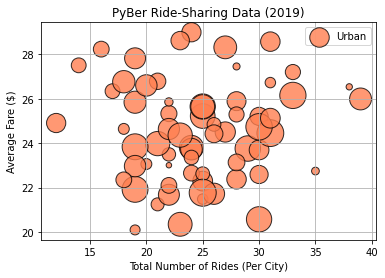

In [27]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, urban_avg_fare, 
            s=10*urban_drivers, color = "coral", edgecolor = "black", linewidths = 1, 
           alpha = 0.8, label = "Urban")
plt.legend()
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

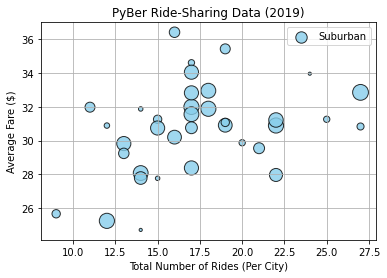

In [28]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_drivers, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

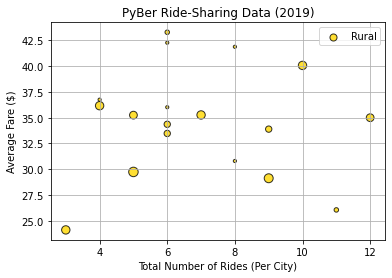

In [29]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_drivers, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

In [30]:
%matplotlib notebook

<IPython.core.display.Javascript object>


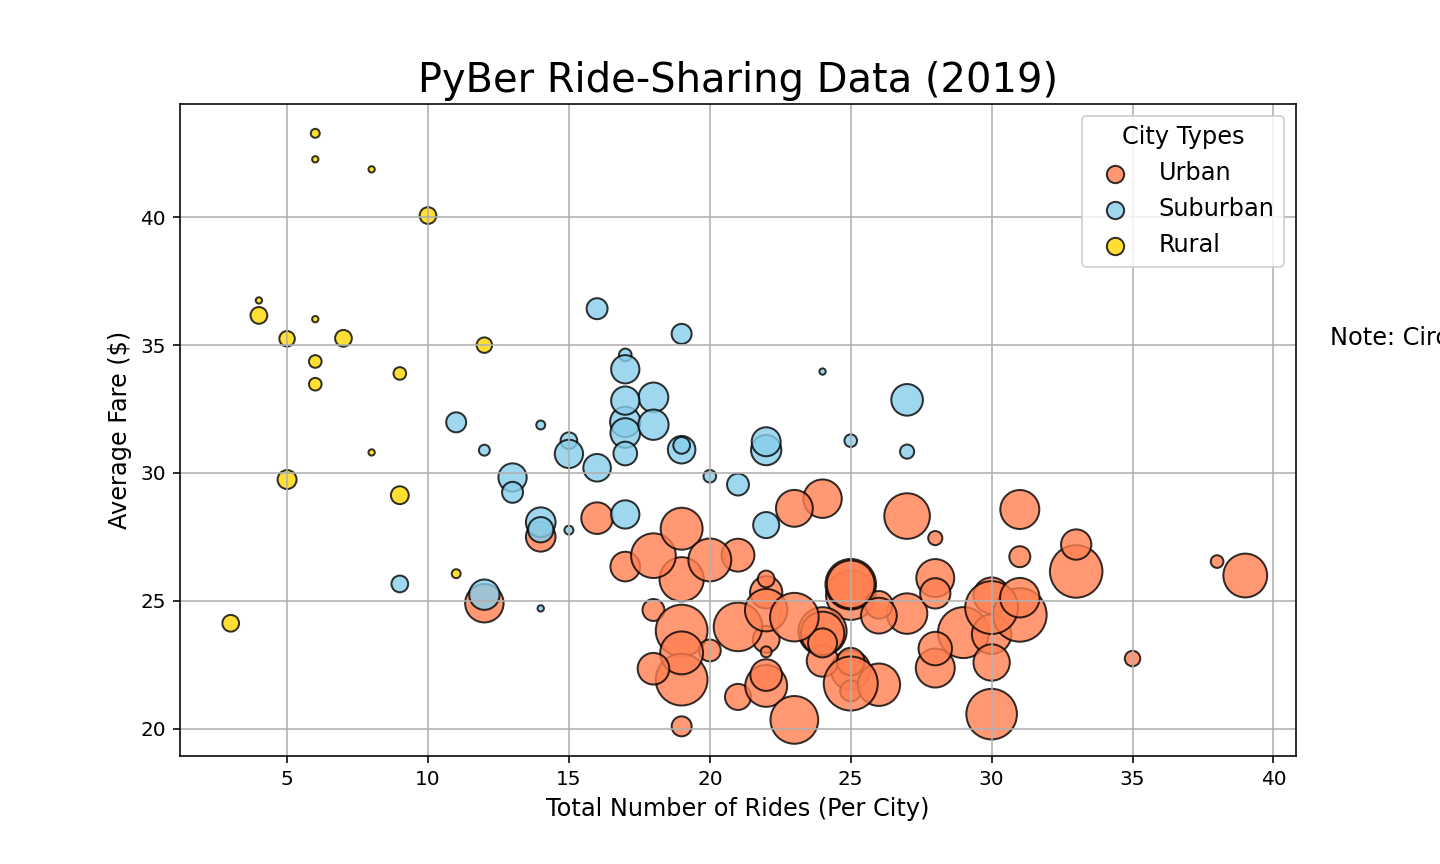

In [31]:
# Add the scatter charts for each type of city.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_drivers, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_drivers, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_drivers, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create & format legend
legnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
legnd.legendHandles[0]._sizes = [75]
legnd.legendHandles[1]._sizes = [75]
legnd.legendHandles[2]._sizes = [75]
legnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Show the plot
plt.show()

# Save figure 
plt.savefig("Bubble_chart.png")

In [32]:
# Get summary statistics.
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [33]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [34]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [35]:
# Get summary statistics of ride count for each city type.
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [36]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [37]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [39]:
# Alternative way - just getting the mean
# Calculate the mean of the ride count for each city type - integer 2 
# represents number of decimal places to be rounded to 
print(round(urban_ride_count.mean(),2)) 
print(round(suburban_ride_count.mean(),2)) 
print(round(rural_ride_count.mean(),2))


24.62
17.36
6.94


In [40]:
#"" for median
print(round(urban_ride_count.median(),2)) 
print(round(suburban_ride_count.median(),2)) 
print(round(rural_ride_count.median(),2))

24.0
17.0
6.0


In [41]:
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [42]:
suburban_ride_count.mode()

0    17
dtype: int64

In [43]:
rural_ride_count.mode()

0    6
dtype: int64

In [44]:
# 3rd way: NumPy and SciPy methods of mean, median and mode 
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [45]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [46]:
sts.mode(suburban_ride_count)

ModeResult(mode=array([17]), count=array([7]))

In [47]:
sts.mode(rural_ride_count)

ModeResult(mode=array([6]), count=array([5]))

In [48]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [49]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")


The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [52]:
suburban_cities_df

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban
...,...,...,...,...,...,...
2245,West Hannah,2019-03-02 17:06:03,13.92,7388937249208,12,Suburban
2246,Lake Robertside,2019-04-03 03:27:45,12.76,1301757653884,4,Suburban
2247,Colemanland,2019-01-10 06:49:58,27.70,8704067171414,23,Suburban
2248,East Marymouth,2019-02-12 23:18:53,47.41,7409660239158,5,Suburban


In [53]:
suburban_fares = suburban_cities_df["fare"]

In [54]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [55]:
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [56]:
rural_fares = rural_cities_df["fare"]

In [57]:
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [58]:
# Perform Summary Stats on number of drivers by city type 
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [62]:
# Skill Drill 
# Continue stats - urban drivers
mean_urban_drivers = np.mean(urban_drivers)
median_urban_drivers = np.median(urban_drivers)
mode_urban_drivers = sts.mode(urban_drivers)
print(f"{mean_urban_drivers:.2f}")
print(median_urban_drivers)
print(mode_urban_drivers)

36.68
37.0
ModeResult(mode=array([39]), count=array([86]))


In [63]:
# Continue stats - suburban drivers
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [64]:
# Continue stats - suburban drivers
mean_suburban_drivers = np.mean(suburban_drivers)
median_suburban_drivers = np.median(suburban_drivers)
mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"{mean_suburban_drivers:.2f}")
print(median_suburban_drivers)
print(mode_suburban_drivers)

13.71
16.0
ModeResult(mode=array([20]), count=array([79]))


In [65]:
# Continue stats - rural drivers
rural_drivers = rural_cities_df['driver_count']
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [66]:
# Continue stats - rural drivers
mean_rural_drivers = np.mean(rural_drivers)
median_rural_drivers = np.median(rural_drivers)
mode_rural_drivers = sts.mode(rural_drivers)
print(f"{mean_rural_drivers:.2f}")
print(median_rural_drivers)
print(mode_rural_drivers)

4.30
4.0
ModeResult(mode=array([1]), count=array([32]))


<IPython.core.display.Javascript object>


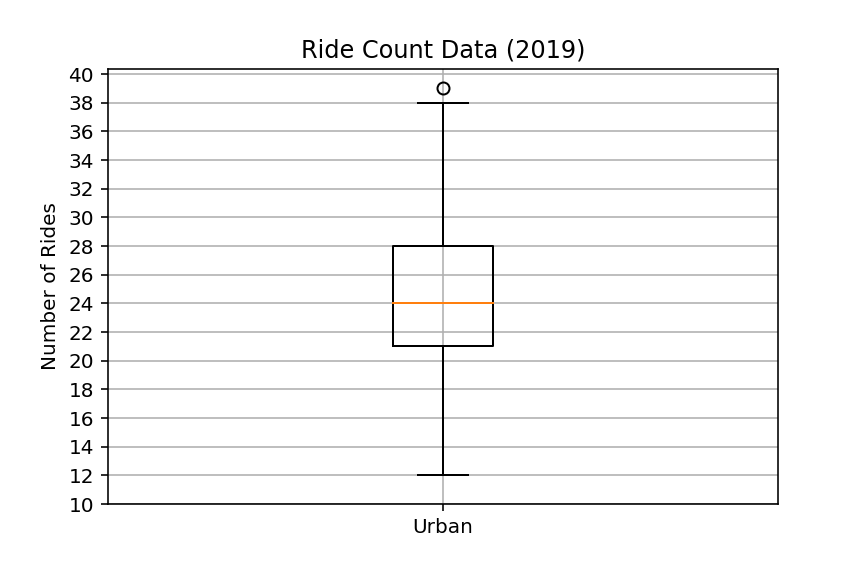

In [68]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

#Add title, y-axis label and gride 
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()


In [69]:
# Compare graph with summary stats in pd.describe()
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

<IPython.core.display.Javascript object>


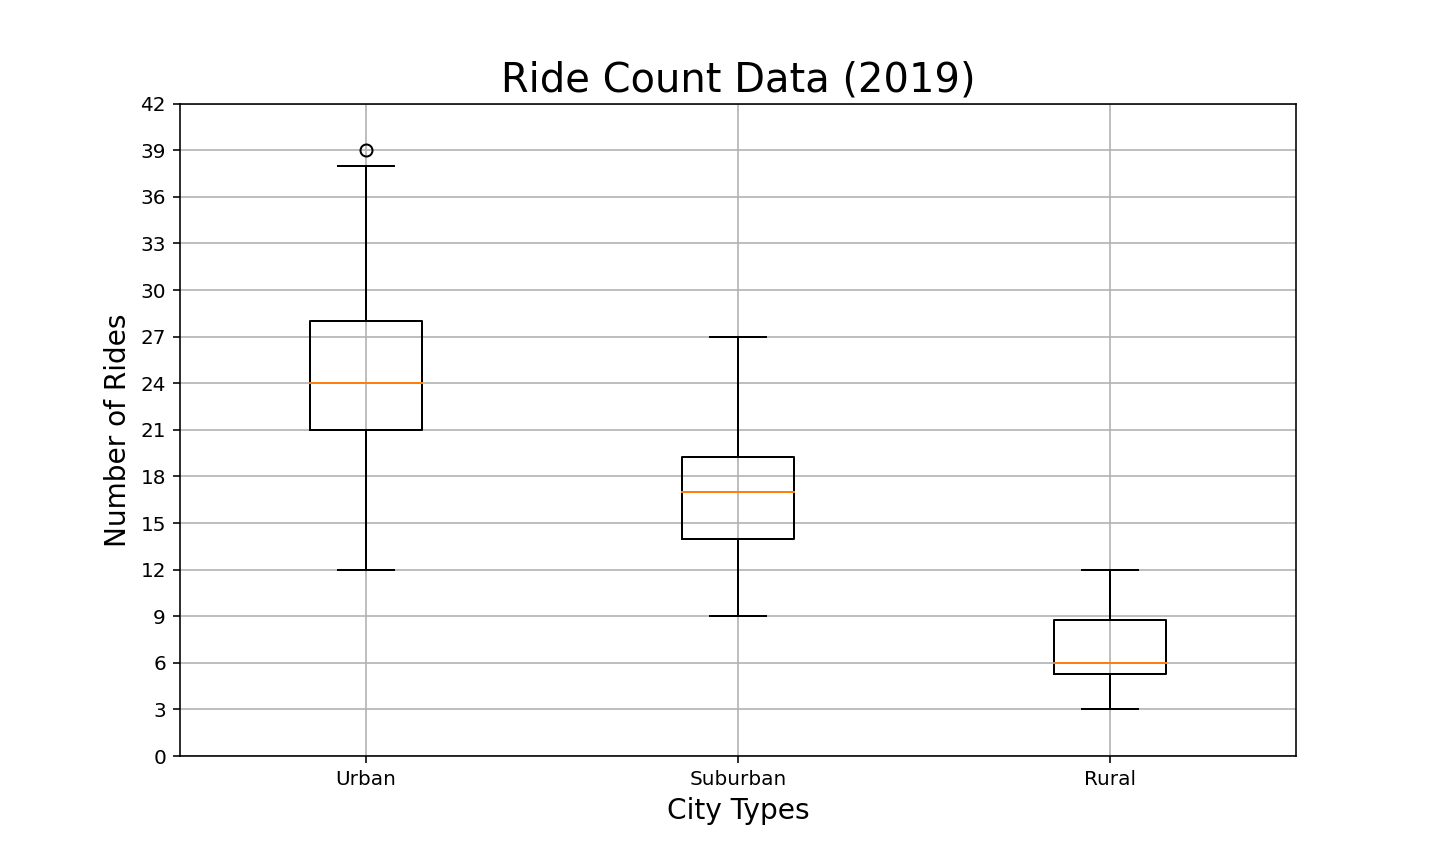

In [70]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("Resources/Fig2_boxandwhisker.png")
plt.show()

In [71]:
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [72]:
# Get the city that matches 39 - i.e find the outlier city in regards to rider count
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


In [73]:
# Test - without .index[0]
urban_city_outlier2 = urban_ride_count[urban_ride_count==39]
urban_city_outlier2

city
West Angela    39
Name: ride_id, dtype: int64

In [74]:
# Create a box-and-whisker plot for the urban fare data.
urban_fares

0       13.83
1       30.24
2       33.44
3       23.44
4       34.58
        ...  
1620    39.40
1621    32.05
1622    38.53
1623     7.63
1624    27.57
Name: fare, Length: 1625, dtype: float64

<IPython.core.display.Javascript object>


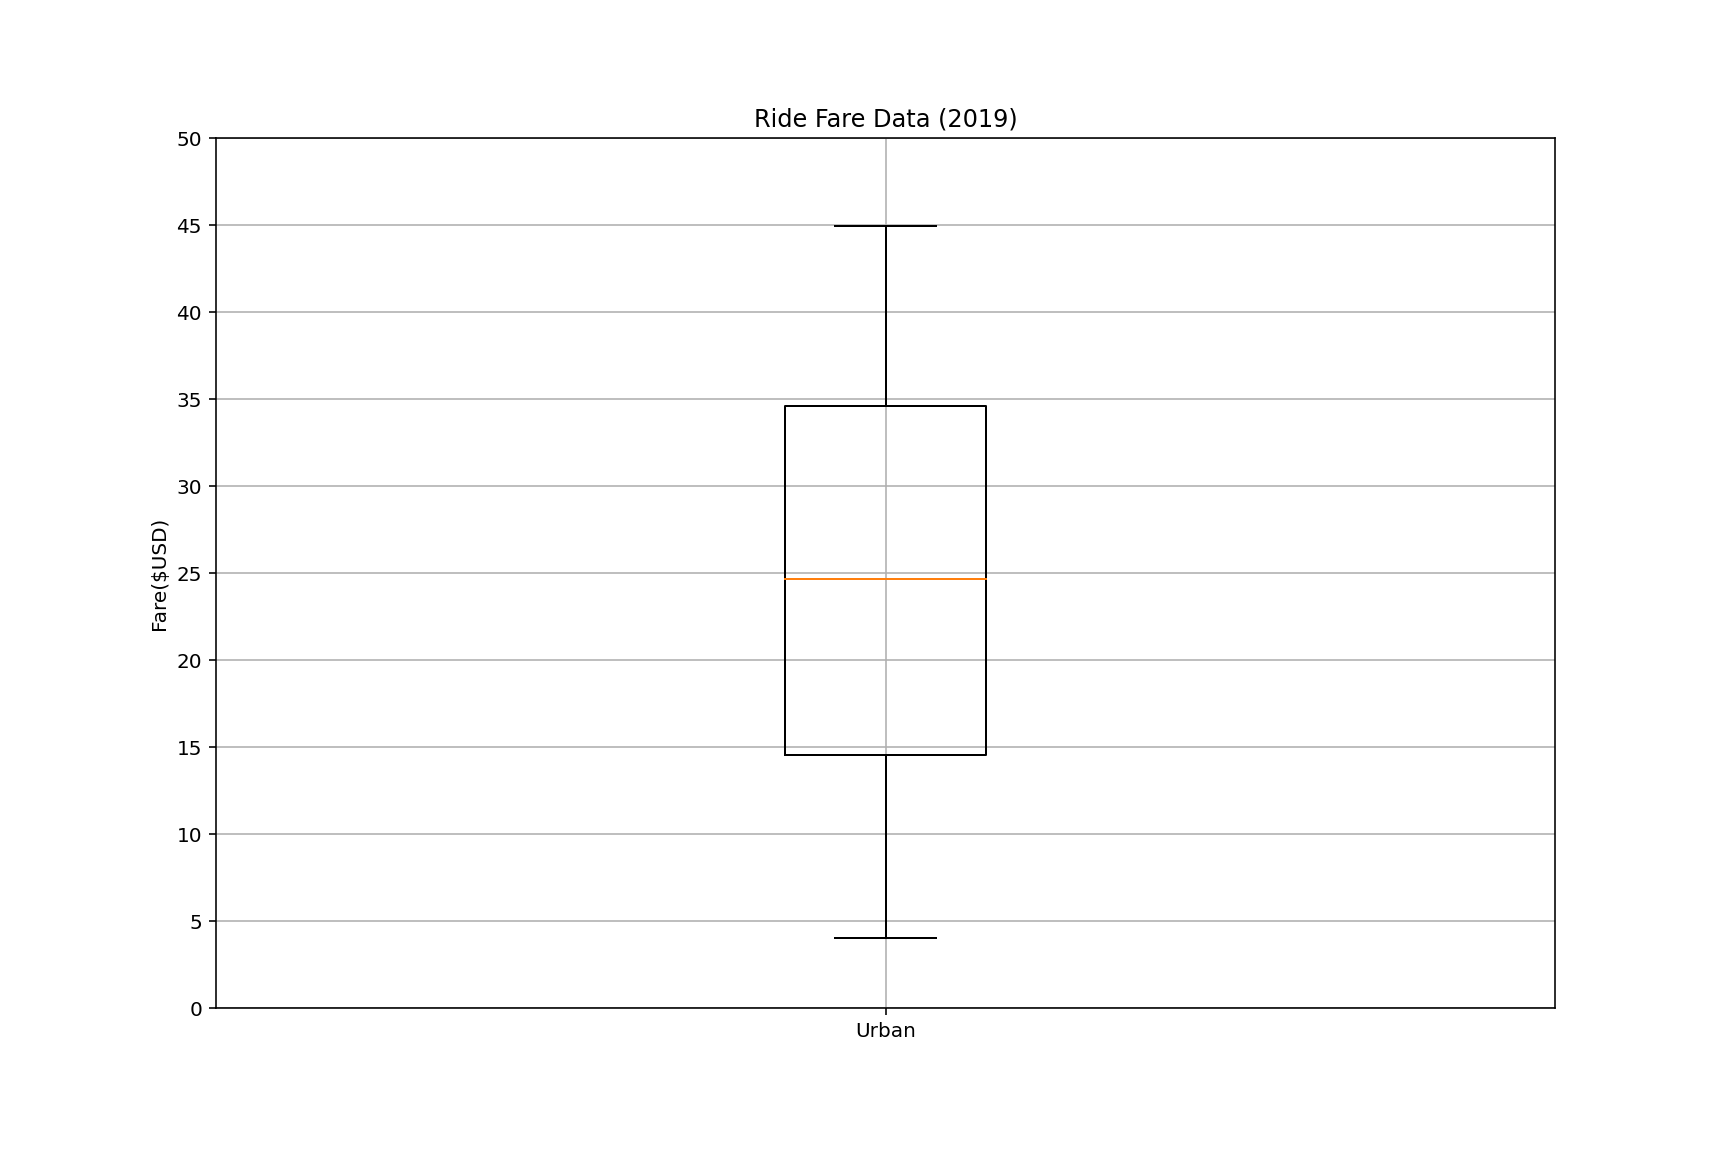

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [75]:
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

In [76]:
suburban_fares

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
        ...  
2245    13.92
2246    12.76
2247    27.70
2248    47.41
2249    17.97
Name: fare, Length: 625, dtype: float64

In [77]:
rural_fares

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
        ...  
2370    13.38
2371    20.76
2372    11.11
2373    44.94
2374    55.84
Name: fare, Length: 125, dtype: float64

<IPython.core.display.Javascript object>


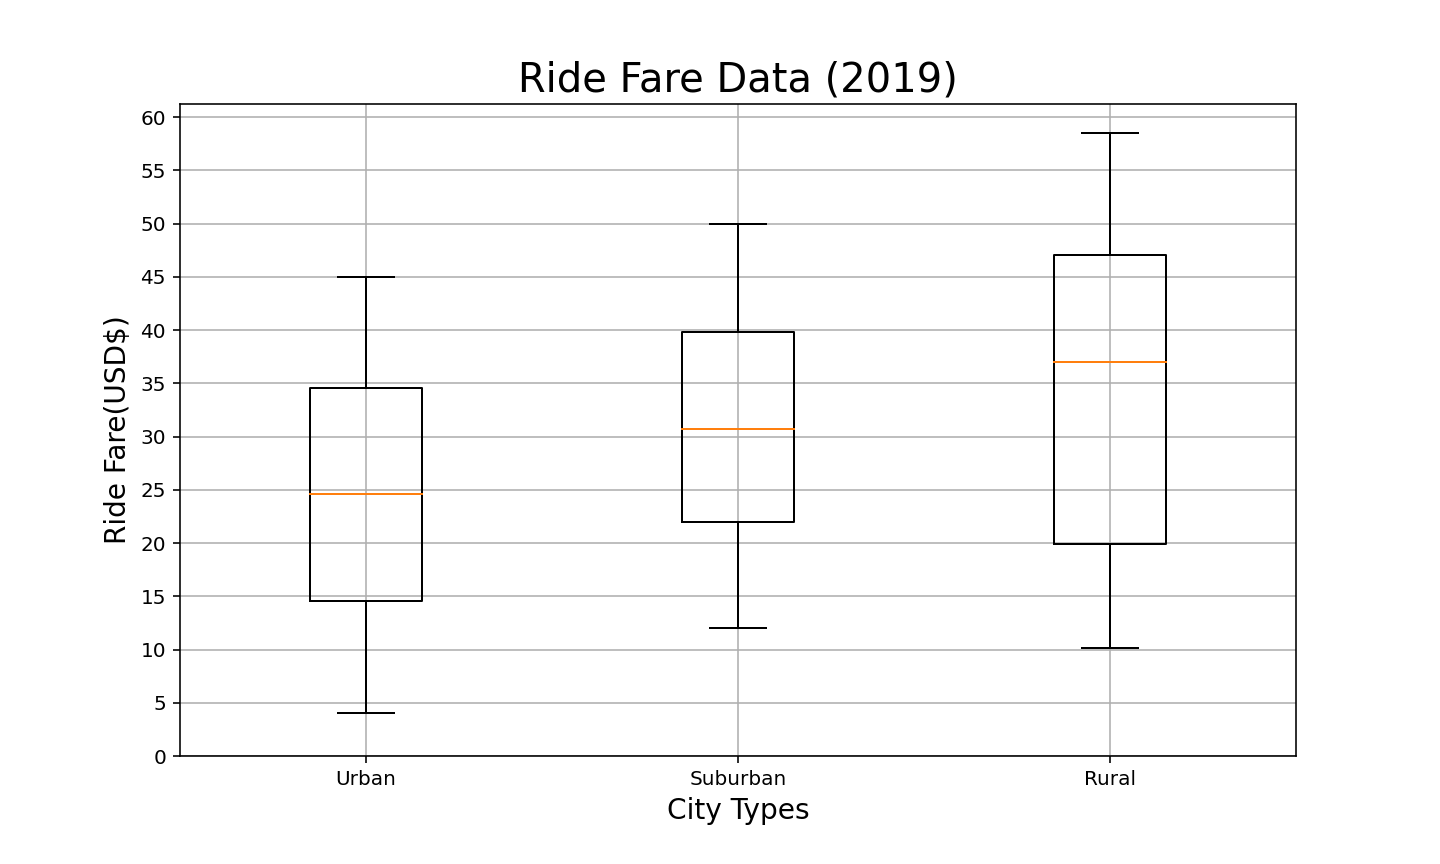

In [79]:
# Add all ride fares in box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Ride Fare(USD$)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 65, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("Resources/Fig3_boxandwhisker_ridefares")
plt.show()

In [84]:
print("Summary Statistics")

print("Urban Stats")
print(urban_fares.describe())

print("Suburban Stats")
print(suburban_fares.describe())

print("Rural Stats")
print(rural_fares.describe())

Summary Statistics
Urban Stats
count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64
Suburban Stats
count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64
Rural Stats
count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64


In [85]:
urban_drivers

0        5
1       72
2       57
3       34
4       46
        ..
1620    67
1621    41
1622    11
1623     3
1624    57
Name: driver_count, Length: 1625, dtype: int64

<IPython.core.display.Javascript object>


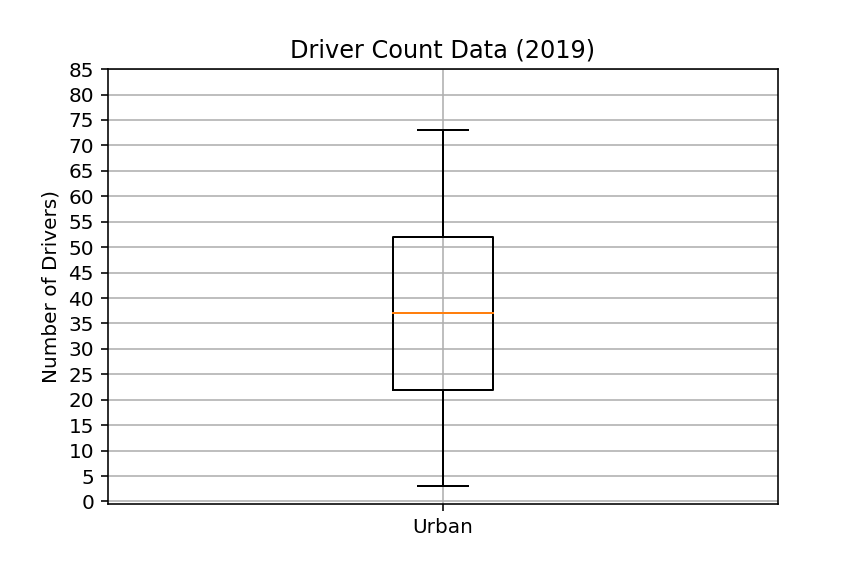

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [86]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

<IPython.core.display.Javascript object>


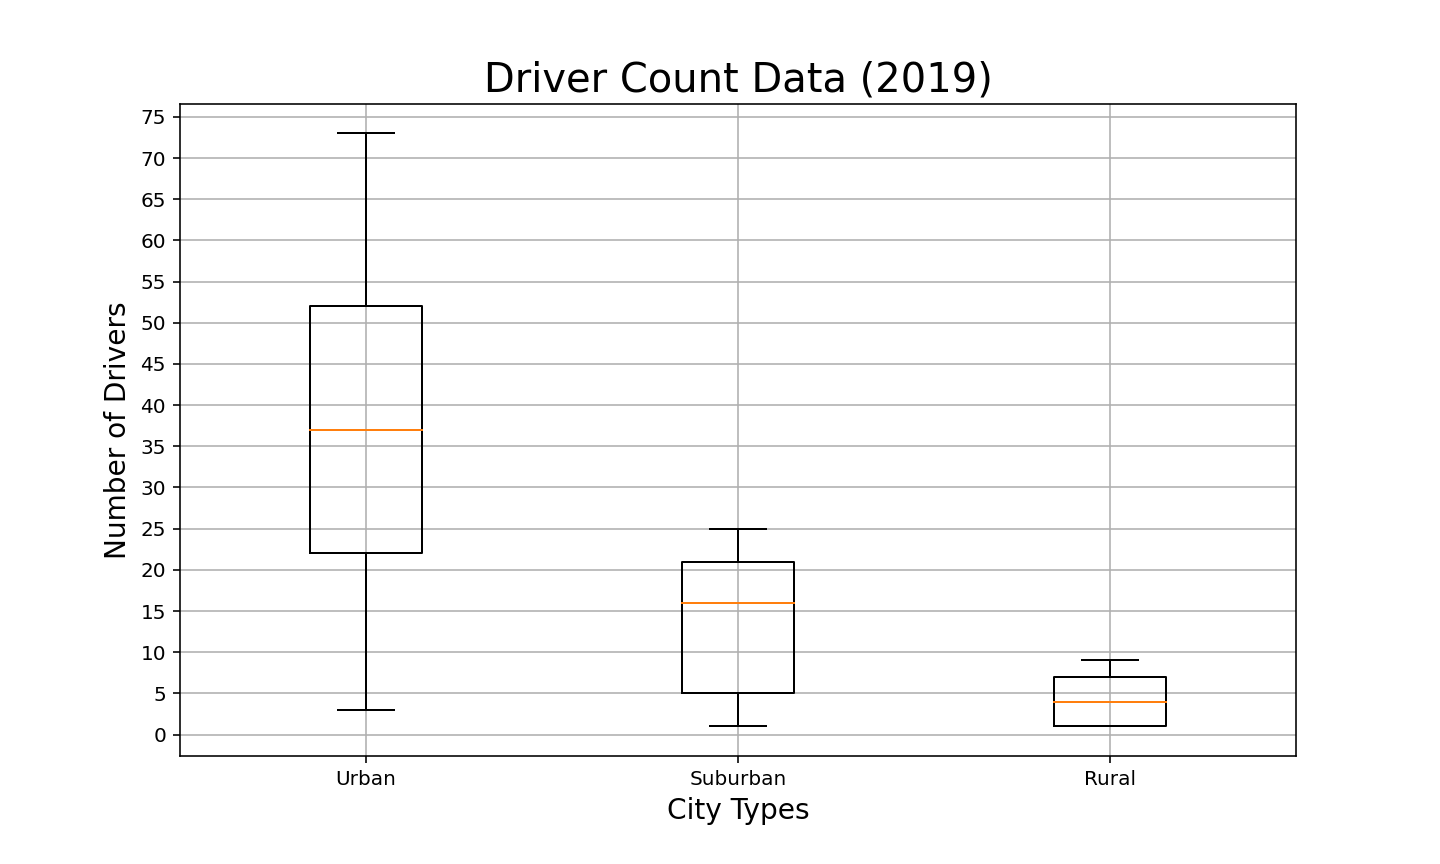

In [88]:
# Add all drivers counts  in box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
driver_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(driver_data, labels=x_labels)
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("Resources/Fig4_boxandwhisker_drivercounts")
plt.show()

In [89]:
print("Summary Statistics")

print("Urban Driver Stats")
print(urban_drivers.describe())

print("Suburban Driver Stats")
print(suburban_drivers.describe())

print("Rural Driver Stats")
print(rural_drivers.describe())

Summary Statistics
Urban Driver Stats
count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64
Suburban Driver Stats
count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64
Rural Driver Stats
count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64
